<a href="https://colab.research.google.com/github/ruiborreicho/RedeNeural/blob/main/redeNeuralv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Rede Neural**

## **Colheita de um dataset de imagens a ser utilizado na rede neural que pretendemos desenvolver**

Criação da diretoria em que serão armazenados os dados do dataset de nuImages, seguido da transferência do mesmo e a descompressão dos dados na diretoria anteriormente criada.

In [1]:
!mkdir -p /nuimages  # Make the directory to store the nuImages dataset in.

!wget https://www.nuscenes.org/data/nuimages-v1.0-mini.tgz  # Download the nuImages mini split.

!tar -xf nuimages-v1.0-mini.tgz -C /nuimages  # Uncompress the nuImages mini split.

#!pip install nuscenes-devkit &> /dev/null

--2022-08-09 14:34:04--  https://www.nuscenes.org/data/nuimages-v1.0-mini.tgz
Resolving www.nuscenes.org (www.nuscenes.org)... 108.156.120.114, 108.156.120.2, 108.156.120.125, ...
Connecting to www.nuscenes.org (www.nuscenes.org)|108.156.120.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117929607 (112M) [application/x-tar]
Saving to: ‘nuimages-v1.0-mini.tgz’

nuimages-v1.0-mini. 100%[===================>] 112.47M   167MB/s    in 0.7s    

2022-08-09 14:34:04 (167 MB/s) - ‘nuimages-v1.0-mini.tgz’ saved [117929607/117929607]



Criação da diretoria onde serão armazenadas todas as imagens.

In [2]:
!mkdir -p /imagens

Importações das bibliotecas que irão ser utilizadas

In [3]:
import glob
import shutil
import os

Definição da diretoria de origem dos ficheiros

In [4]:
src_dir = "/nuimages"

Definição da diretoria de destino dos ficheiros

In [5]:
dst_dir = "/imagens"

Instruções desenvolvidas que permitem a cópia de todos os ficheiros de formato .JPG da diretoria de origem para a diretoria de destino, que foram declaradas e definidas anteriormente.

In [6]:
!rm -rf /imagens/* #Delete all files located in imagens directory

In [7]:
for root, _, files in os.walk(src_dir, topdown=True):
   for name in files:
      if name.endswith('.jpg') :
        file_path = os.path.join(root, name)
        shutil.copy(file_path, dst_dir)

In [29]:
!pip install --upgrade google-api-python-client
!pip install google-cloud
!pip install google-cloud-vision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 386 kB 5.2 MB/s 
     |████████████████████████████████| 46 kB 3.8 MB/s 
     |████████████████████████████████| 1.0 MB 45.9 MB/s 
     |████████████████████████████████| 114 kB 62.6 MB/s 
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.17.3
    Uninstalling protobuf-3.17.3:
      Successfully uninstalled protobuf-3.17.3
  Attempting uninstall: google-api-core
    Found existing installation: google-api-core 1.31.6
    Uninstalling google-api-core-1.31.6:
      Successfully uninstalled google-api-core-1.31.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviou

In [9]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [11]:
!cp -av "/imagens" "/gdrive/MyDrive/IMAGENS"

'/imagens' -> '/gdrive/MyDrive/IMAGENS/imagens'
'/imagens/n013-2018-09-04-13-30-50+0800__CAM_FRONT_LEFT__1536039168104825.jpg' -> '/gdrive/MyDrive/IMAGENS/imagens/n013-2018-09-04-13-30-50+0800__CAM_FRONT_LEFT__1536039168104825.jpg'
'/imagens/n010-2018-09-17-15-57-10+0800__CAM_FRONT_LEFT__1537171282504509.jpg' -> '/gdrive/MyDrive/IMAGENS/imagens/n010-2018-09-17-15-57-10+0800__CAM_FRONT_LEFT__1537171282504509.jpg'
'/imagens/n013-2018-08-16-16-15-38+0800__CAM_FRONT_LEFT__1534408311904825.jpg' -> '/gdrive/MyDrive/IMAGENS/imagens/n013-2018-08-16-16-15-38+0800__CAM_FRONT_LEFT__1534408311904825.jpg'
'/imagens/n013-2018-09-03-14-54-42+0800__CAM_FRONT_LEFT__1535958018154825.jpg' -> '/gdrive/MyDrive/IMAGENS/imagens/n013-2018-09-03-14-54-42+0800__CAM_FRONT_LEFT__1535958018154825.jpg'
'/imagens/n013-2018-08-29-14-19-16+0800__CAM_FRONT_LEFT__1535524658904825.jpg' -> '/gdrive/MyDrive/IMAGENS/imagens/n013-2018-08-29-14-19-16+0800__CAM_FRONT_LEFT__1535524658904825.jpg'
'/imagens/n005-2018-06-14-20-11-

## **Criação rede neural**

### **Instalação de bibliotecas necessárias**

Verificação da instalação da biblioteca tensorflow

In [2]:
%tensorflow_version 2.x
!pip show tensorflow

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Name: tensorflow
Version: 2.9.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: opt-einsum, tensorflow-estimator, grpcio, tensorflow-io-gcs-filesystem, numpy, flatbuffers, libclang, keras, gast, tensorboard, wrapt, typing-extensions, setuptools, google-pasta, protobuf, keras-preprocessing, astunparse, six, packaging, absl-py, h5py, termcolor
Required-by: tflite-model-maker, tf-models-official, tensorflowjs, tensorflow-text, tensorflow-object-detection-api, scann, kapre


Instalação da biblioteca tf_slim

In [3]:
!pip install tf_slim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Instalação da biblioteca tensorflow_io

In [4]:
!pip install tensorflow_io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Instalação da biblioteca tf-models-official

In [5]:
!pip install -U tf-models-official

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached tf_models_official-2.9.2-py2.py3-none-any.whl (2.1 MB)
  Attempting uninstall: tf-models-official
    Found existing installation: tf-models-official 2.3.0
    Uninstalling tf-models-official-2.3.0:
      Successfully uninstalled tf-models-official-2.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tflite-model-maker 0.4.0 requires tf-models-official==2.3.0, but you have tf-models-official 2.9.2 which is incompatible.


Clonagem do repositório Tensorflow Models

In [6]:
%cd /root/
!git clone https://github.com/tensorflow/models.git

/root
fatal: destination path 'models' already exists and is not an empty directory.


Instalação do Tensorboard

In [7]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip -o ngrok-stable-linux-amd64.zip

--2022-08-11 14:41:22--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 18.205.222.128, 54.237.133.81, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]  13.19M  4.39MB/s    in 3.0s    

2022-08-11 14:41:27 (4.39 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [10]:
#the logs that are created while training 
LOG_DIR = "/root/models/trained"
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)
get_ipython().system_raw('./ngrok http 6006 &')
#The link to tensorboard.
#works after the training starts.
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/usr/lib/python3.7/json/__init__.py", line 296, in load
    parse_constant=parse_constant, object_pairs_hook=object_pairs_hook, **kw)
  File "/usr/lib/python3.7/json/__init__.py", line 348, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.7/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.7/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 1 column 1 (char 0)


Configuração do ambiente

In [8]:
#deve ser corrido antes da segunda parte do código anterior
%cd /root/models/research/
!protoc object_detection/protos/*.proto --python_out=.
import os
os.environ['PYTHONPATH'] += ':/root/models/research/:/root/models/research/slim/:/root/models/research/object_detection/utils/:/root/models/research/object_detection'
!python object_detection/builders/model_builder_test.py

/root/models/research


### **Coleção de imagens, criação do das labels nos dados e criação do mapa das labels**

O primeiro passo efetuado nesta etapa foi a coleção de imagens para a criação de um dataset. Para realizar essa tarefa, utilizamos o código demonstrado na primeira parte deste Colab Notebook, em que fomos transferir as imagens do dataset nuImages para um Google Drive.

De seguida, utilizamos um programa denominado de labelImg, que pode ser instalado numa máquina Windows (que possua uma versão recente de Python e o Pip), com o comando demonstrado abaixo, e utilizamos esse programa para anotar as imagens com quais os objetos que queremos que este referencie, a localização dos mesmos e o seu respetivo nome.

In [ ]:
!pip3 install labelImg #o comando deve ser corrido sem o "!" na máquina local

O dataset que foi transferido na sua totalidade possui **465 imagens**, logo, e com a finalidade de testar a rede neural e conseguir que a mesma esteja a funcionar, decidimos começar por selecionar apenas uma parte das imagens colecionadas, neste caso **49 imagens** que compõem o dataset "sample" do nuImages.

Depois da anotação de cada imagem, é criado um ficheiro XML que fornece as informações acerca das anotações que foram efetuadas, sendo que iremos fornecer um exemplo de um desses ficheiros de seguida.

In [ ]:
#este é o exemplo de um dos ficheiros XML gerados, que teve de ser apropriamente anotado pois não se trata de uma linguagem permitida pelo Colab
#<annotation>
#	<folder>images</folder>
#	<filename>3.jpg</filename>
#	<path>C:\Users\rborreic\Desktop\Projects\RedeNeural\images\3.jpg</path>
#	<source>
#		<database>Unknown</database>
#	</source>
#	<size>
#		<width>1600</width>
#		<height>900</height>
#		<depth>3</depth>
#	</size>
#	<segmented>0</segmented>
#	<object>
#		<name>car</name>
#		<pose>Unspecified</pose>
#		<truncated>0</truncated>
#		<difficult>0</difficult>
#		<bndbox>
#			<xmin>638</xmin>
#			<ymin>419</ymin>
#			<xmax>706</xmax>
#			<ymax>469</ymax>
#		</bndbox>
#	</object>
#	<object>
#		<name>van</name>
#		<pose>Unspecified</pose>
#		<truncated>0</truncated>
#		<difficult>0</difficult>
#		<bndbox>
#			<xmin>772</xmin>
#			<ymin>409</ymin>
#			<xmax>862</xmax>
#			<ymax>502</ymax>
#		</bndbox>
#	</object>
#</annotation>

Dando por terminadas as anotações no nosso dataset de teste, iremos então proceder ao upload dos ficheiros para o Colab. Para simplificar este processo iremos clonar as imagens, que foram entretanto depositadas no repositório GitHub do projeto para a pasta do tensorflow models que foi clonada anteriormente.

In [22]:
#!rm -rf /root/models/RedeNeural/ #Delete all files located in RedeNeural directory
#!rm -r /root/models/RedeNeural #Delete RedeNeural folder

In [10]:
%cd /root/models/
!git clone https://github.com/ruiborreicho/RedeNeural

/root/models
Cloning into 'RedeNeural'...
remote: Enumerating objects: 133, done.
remote: Counting objects: 100% (133/133), done.
remote: Compressing objects: 100% (80/80), done.
remote: Total 133 (delta 51), reused 124 (delta 48), pack-reused 0
Receiving objects: 100% (133/133), 18.44 MiB | 13.29 MiB/s, done.
Resolving deltas: 100% (51/51), done.


### **Criação de um label map**

Criação de um label map, uma representação de todos os objetos que expectamos encontrar dentro das anotações criadas (ficheiros XML)

In [11]:
labels = [{'name':'car', 'id':1}, {'name':'truck', 'id':2}, {'name':'motorbike', 'id':3}, {'name':'bus', 'id':4}, {'name':'van', 'id':5}, {'name':'bike', 'id':6}]

In [12]:
%cd /root/models/RedeNeural/annotations
with open('labelMap.pbtxt', 'w') as f:
  for label in labels:
    f.write('item{\n')
    f.write('\tname:\'{}\'\n'.format(label['name']))
    f.write('\tid:{}\n'.format(label['id']))
    f.write('}\n')

/root/models/RedeNeural/annotations


### **Criação dos TFRecords**

Utilização do ficheiro generate_tfrecord.py, fornecido pelo tutorial oficial do Object Detection API, que permite a conversão dos dados para o formato requirido pelo modelo.

In [13]:
!python {'/root/models/RedeNeural/tfrecord/generate_tfrecord.py'} -x {'/root/models/RedeNeural/images/train'} -l {'/root/models/RedeNeural/annotations/labelMap.pbtxt'} -o {'/root/models/RedeNeural/annotations/train.record'}
!python {'/root/models/RedeNeural/tfrecord/generate_tfrecord.py'} -x {'/root/models/RedeNeural/images/test'} -l {'/root/models/RedeNeural/annotations/labelMap.pbtxt'} -o {'/root/models/RedeNeural/annotations/test.record'}

Successfully created the TFRecord file: /root/models/RedeNeural/annotations/train.record
Successfully created the TFRecord file: /root/models/RedeNeural/annotations/test.record


### **Transferência e setup do SSD MobileNet v2**

Para realizarmos o treino do nosso modelo iremos utilizar um modelo já existente para ajudar no processo, sendo o escolhido o SSD MobileNet v2. Nos próximos passos iremos fazer a transferência, movimentação do ficheiro transferido e a descompressão do mesmo.

In [29]:
#!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz  # Download the nuImages mini split.
#!mv ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz {'/root/models/RedeNeural/'}
#!cd {'/root/models/RedeNeural/'} && tar -zxvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

--2022-08-10 14:24:27--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.195.128, 2607:f8b0:400e:c09::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.195.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  --.-KB/s    in 0.08s   

2022-08-10 14:24:27 (249 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8

Iremos agora criar uma diretoria com o nome de "my_ssd_mobnet" onde iremos copiar o ficheiro de pipeline.config do modelo já existente.

In [14]:
!mkdir -p /root/models/my_ssd_mobnet
!cp {'/root/models/RedeNeural/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config'} {'/root/models/my_ssd_mobnet/'}

### **Update no ficheiro de config para a transferência do conhecimento**

Antes de darmos por inicio ao update do ficheiro, serão necessárias importar algumas dependências.

In [11]:
!pip install tensorflow-object-detection-api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import tensorflow as tf
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

Configuração do caminho até ao ficheiro de config

In [17]:
CONFIG_PATH = '/root/models/my_ssd_mobnet/pipeline.config'

In [18]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(CONFIG_PATH, "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config) 

In [19]:
pipeline_config.model.ssd.num_classes = 6
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = '/root/models/RedeNeural/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0'
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path = '/root/models/RedeNeural/annotations/labelMap.pbtxt'
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = ['/root/models/RedeNeural/annotations/train.record']
pipeline_config.eval_input_reader[0].label_map_path = '/root/models/RedeNeural/annotations/labelMap.pbtxt'
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = ['/root/models/RedeNeural/annotations/test.record']

In [23]:
#pipeline_config

In [20]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(CONFIG_PATH, "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

### **Treinar o modelo**

In [21]:
!pip install lvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
# Check libcudnn8 version
!apt-cache policy libcudnn8

# Install latest version
!apt install --allow-change-held-packages libcudnn8=8.4.1.50-1+cuda11.6

# Export env variables
!export PATH=/usr/local/cuda-11.4/bin${PATH:+:${PATH}}
!export LD_LIBRARY_PATH=/usr/local/cuda-11.4/lib64:$LD_LIBRARY_PATH
!export LD_LIBRARY_PATH=/usr/local/cuda-11.4/include:$LD_LIBRARY_PATH
!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/local/cuda/extras/CUPTI/lib64

# Install tensorflow
!pip install tflite-model-maker==0.4.0
!pip uninstall -y tensorflow && pip install -q tensorflow==2.9.1
!pip install pycocotools==2.0.4
!pip install opencv-python-headless==4.6.0.66

libcudnn8:
  Installed: 8.4.1.50-1+cuda11.6
  Candidate: 8.4.1.50-1+cuda11.6
  Version table:
 *** 8.4.1.50-1+cuda11.6 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
        100 /var/lib/dpkg/status
     8.4.1.50-1+cuda10.2 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.4.0.27-1+cuda11.6 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.4.0.27-1+cuda10.2 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.3.3.40-1+cuda11.5 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.3.3.40-1+cuda10.2 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages
     8.3.2.44-1+cuda11.5 600
        600 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  

In [12]:
!python /root/models/research/object_detection/model_main_tf2.py --model_dir=/root/models/my_ssd_mobnet --pipeline_config_path=/root/models/my_ssd_mobnet/pipeline.config --num_train_steps=1000

2022-08-11 14:42:29.061738: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0811 14:42:29.067749 140472768391040 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 1000
I0811 14:42:29.072708 140472768391040 config_util.py:552] Maybe overwriting train_steps: 1000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0811 14:42:29.072881 140472768391040 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W0811 14:42:29.099296 140472768391040 deprecation.py:356] From /root/models/research/object_detection/model_lib_v2.py:564: StrategyBase.experimental_distribute_datas

In [54]:
import os
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_utils
from object_detection.builders import model_builder


# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file('/root/models/my_ssd_mobnet/pipeline.config')
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join('/root/models/my_ssd_mobnet', 'ckpt-2')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [59]:
!python /root/models/research/object_detection/exporter_main_v2.py \
    --trained_checkpoint_dir /root/models/my_ssd_mobnet/ \
    --output_directory /root/models/ \
    --pipeline_config_path /root/models/my_ssd_mobnet/pipeline.config

2022-08-11 15:55:07.754818: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0811 15:55:08.003812 139706633283456 deprecation.py:628] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:458: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W0811 15:55:27.353151 1397066332834

In [19]:
import cv2 
import numpy as np

In [64]:
category_index = label_map_util.create_category_index_from_labelmap('/root/models/RedeNeural/annotations/labelMap.pbtxt')
model = tf.saved_model.load('/root/models/saved_model')

In [38]:
#cap.release()

In [ ]:
#from IPython.display import Image
# Setup capture
#cap = cv2.VideoCapture(0)
cap = Image('/root/models/RedeNeural/images/test/17.jpg')
#width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
#height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while True: 
    frame = Image('/root/models/RedeNeural/images/test/17.jpg')
    if frame is None:
      print('erro')
      break
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.5,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        cap.release()
        break

In [74]:
from six import BytesIO
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path (this can be local or on colossus)

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [71]:
from object_detection.utils import ops as utils_ops

def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

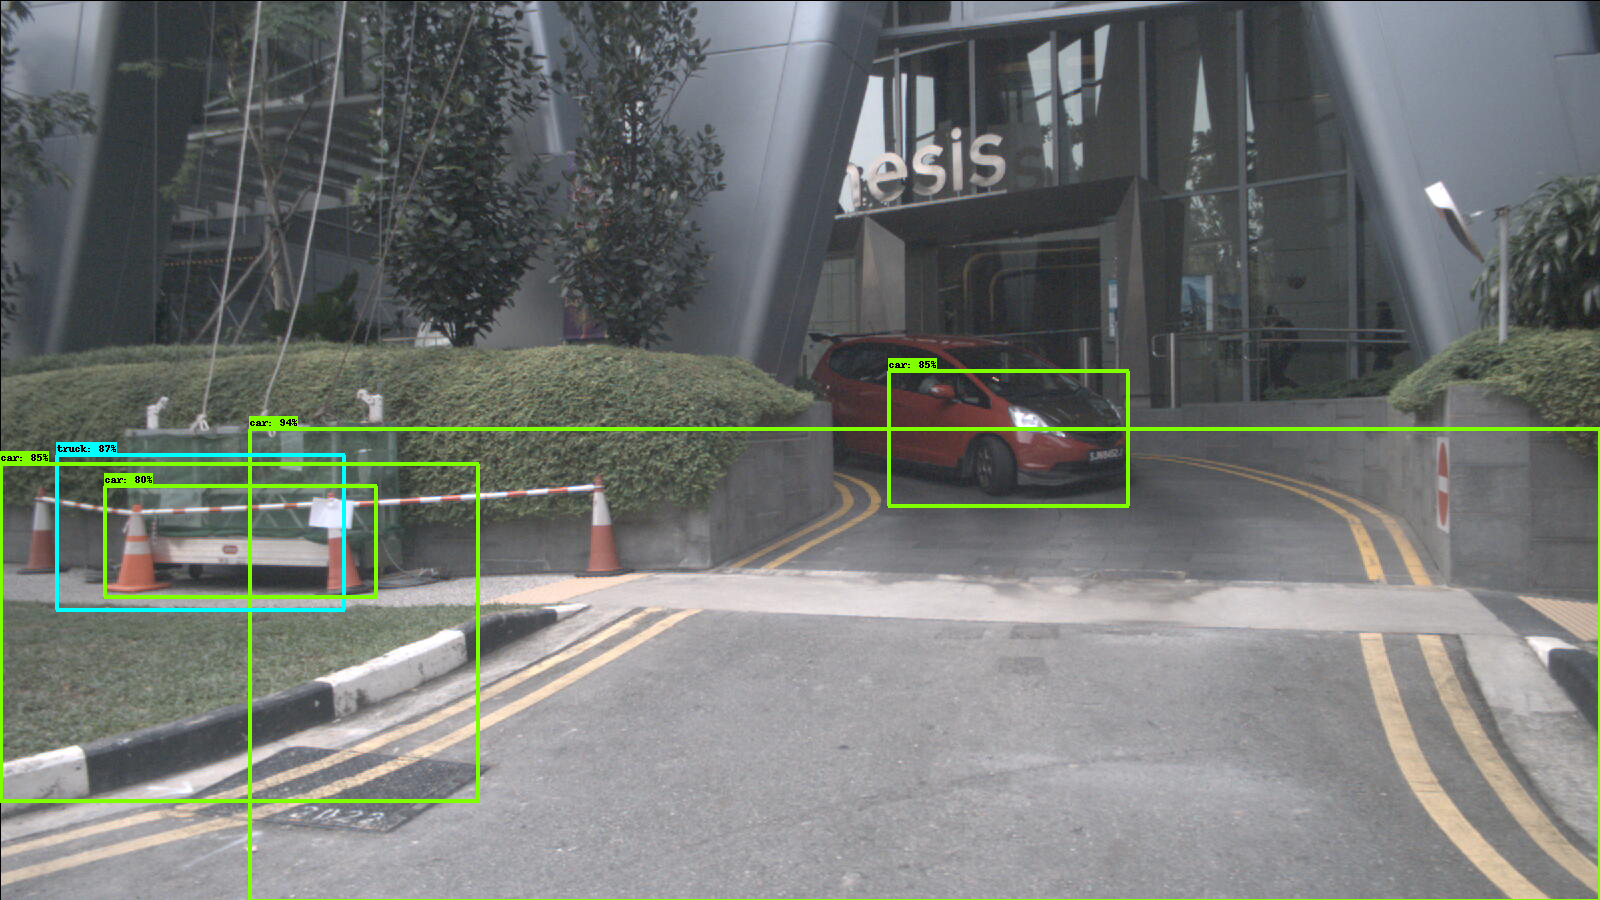

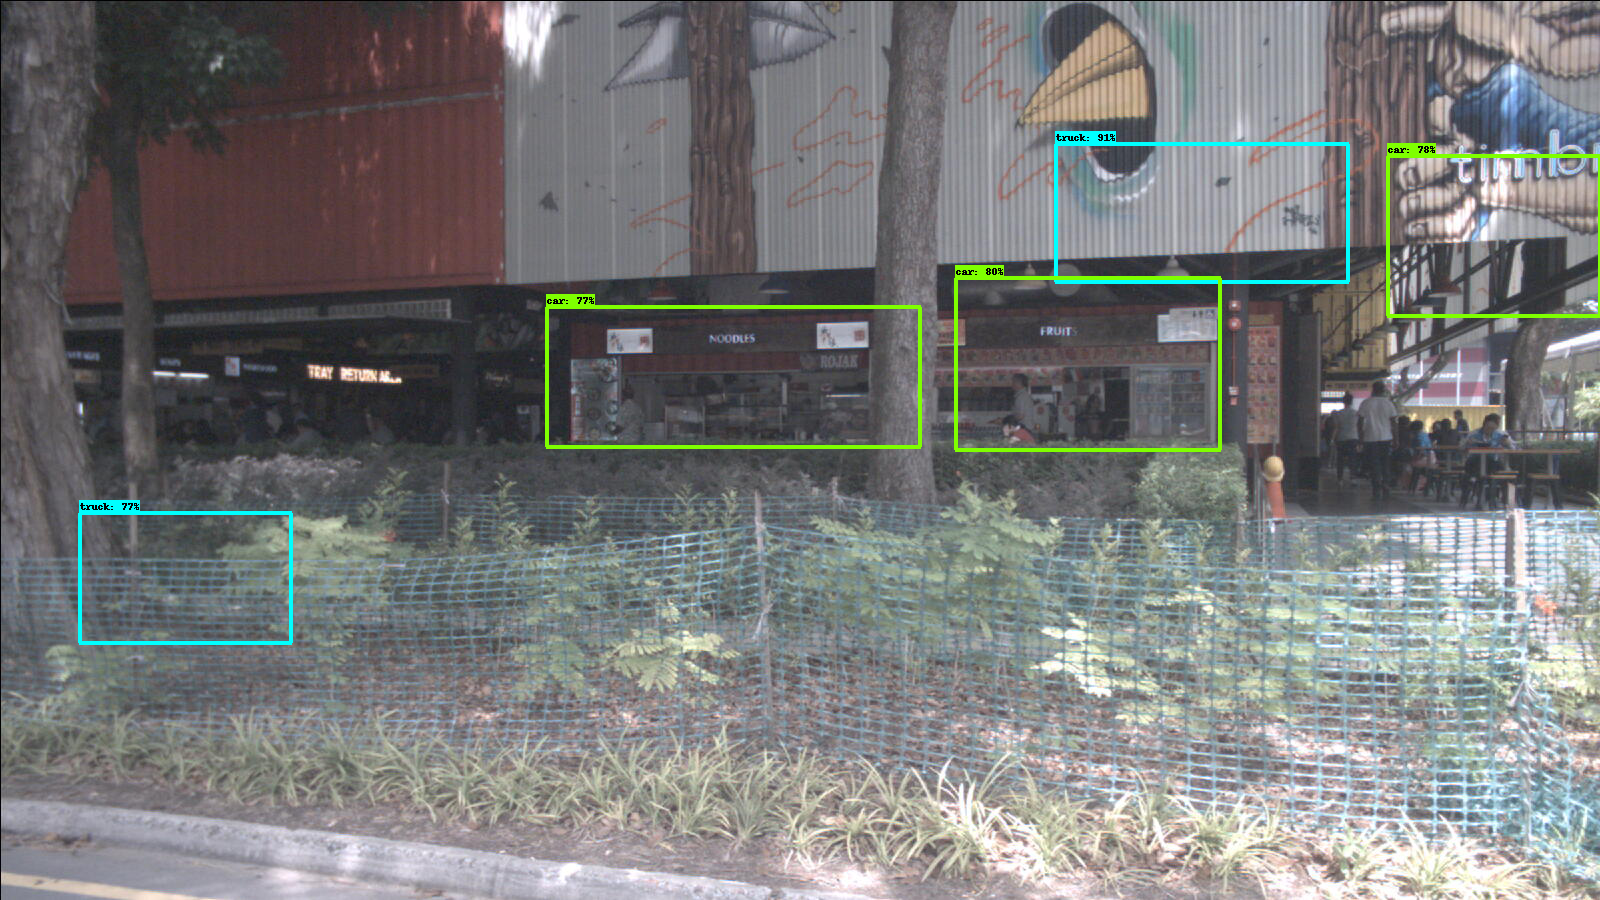

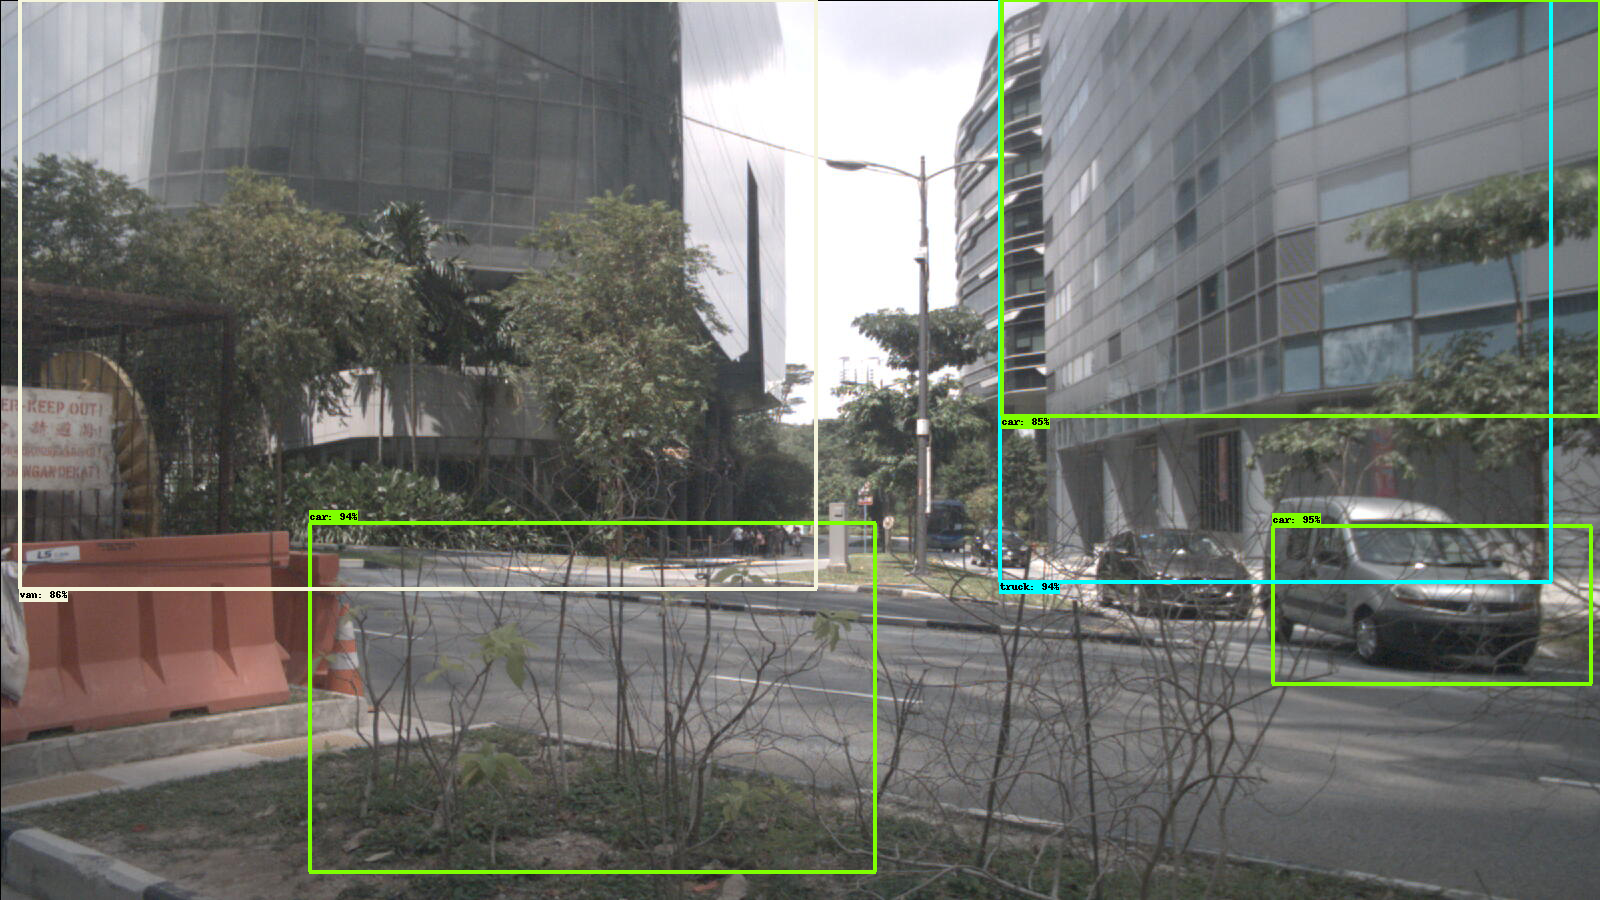

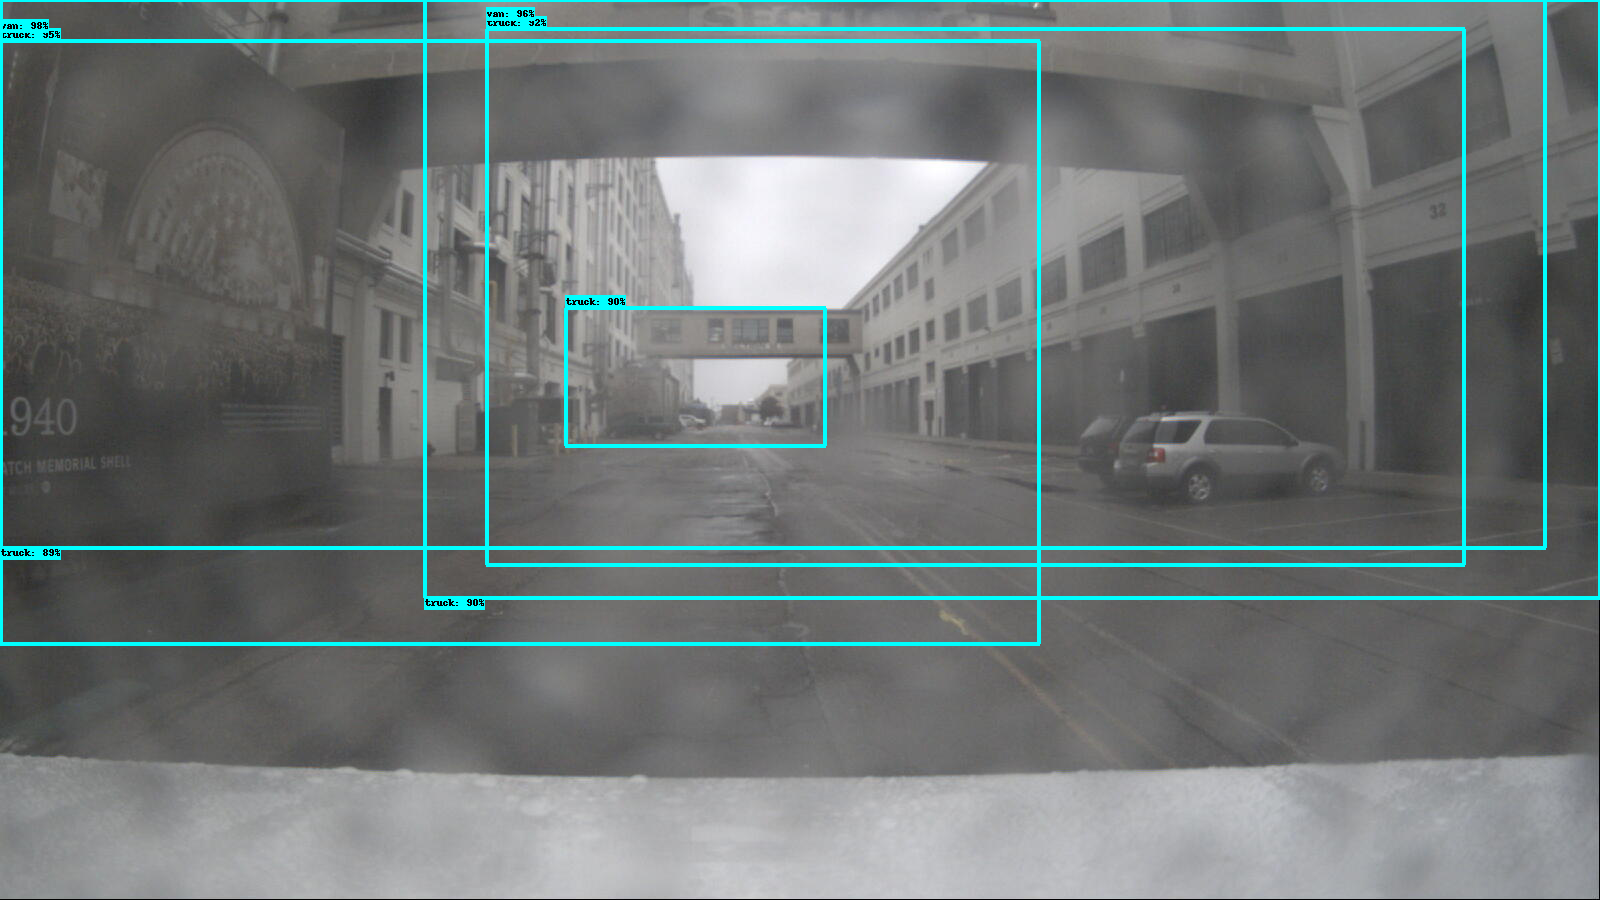

In [81]:
images = ['/root/models/RedeNeural/images/test/17.jpg', '/root/models/RedeNeural/images/test/20.jpg', '/root/models/RedeNeural/images/test/46.jpg', '/root/models/RedeNeural/images/test/5.jpg']

for image_name in images:
  
  image_np = load_image_into_numpy_array(image_name)
  output_dict = run_inference_for_single_image(model, image_np)

  vis_utils.visualize_boxes_and_labels_on_image_array(
                image_np,
                output_dict['detection_boxes'],
                output_dict['detection_classes'],
                output_dict['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.5,
                agnostic_mode=False)
  display(Image.fromarray(image_np))